In [18]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [20]:
# File Paths
MODEL_PATH = "model/1.tflite"
IMAGE_PATH = "images/input.jpg"
OUTPUT_PATH = "images/cartoonized_output.jpg"

In [22]:
# Preprocessing Image Function
def preprocess_image(image_path):
    """Loads and preprocesses image for CartoonGAN."""
    image = cv2.imread(image_path)  # Read image in BGR format
    image = cv2.resize(image, (512, 512))  # Resize to 512x512
    image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [24]:
# Load Model Function
def load_model(model_path):
    """Loads the TensorFlow Lite model."""
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter


In [26]:
# Cartoonizing Function
def cartoonize_image(interpreter, image):
    """Runs the CartoonGAN model on the input image."""
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    
    output = np.squeeze(output)  # Remove batch dimension
    output = (output * 255).astype(np.uint8)  # Rescale to [0,255]
    return output


In [28]:
# Display Function for Jupyter
def display_image(image, title="Image"):
    """Displays the image using Matplotlib."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")  # Hide axes
    plt.show()


In [30]:
# Save and Display Function
def save_and_display_image(image, output_path):
    """Saves and displays the image."""
    cv2.imwrite(output_path, image)
    print(f"Cartoonized image saved at: {output_path}")
    display_image(image, title="Cartoonized Image")


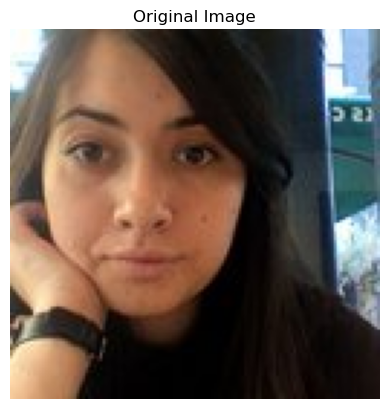

Model Loaded Successfully!
Cartoonized image saved at: images/cartoonized_output.jpg


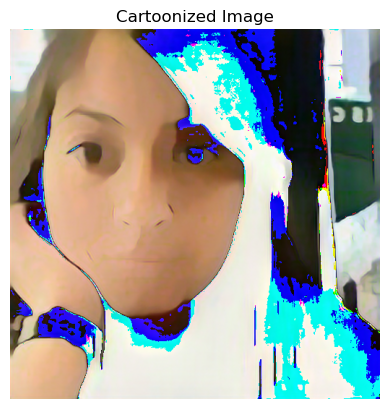

In [32]:
# Main Section for Jupyter
if __name__ == "__main__":
    if not os.path.exists(IMAGE_PATH):
        print("Error: Input image not found!")
    else:
        # 1. Load and display the original image
        original_image = cv2.imread(IMAGE_PATH)
        display_image(original_image, title="Original Image")

        # 2. Process the image and apply the cartoonization
        image = preprocess_image(IMAGE_PATH)
        interpreter = load_model(MODEL_PATH)
        print("Model Loaded Successfully!")

        cartoonized_image = cartoonize_image(interpreter, image)

        # 3. Save and display the cartoonized image
        save_and_display_image(cartoonized_image, OUTPUT_PATH)
